<a href="https://colab.research.google.com/github/Nimere1990/VAE/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. ВВОДНАЯ ЧАСТЬ**

**Название работы:** *Генерация лиц с помощью вариационного автоэнкодера (VAE)*

**Автор:** *Ерёмин Иван Евгеньевич*

**Аннотация:** *В данной работе мы рассматриваем архитектуру вариационного автоэнкодера для генерации изображений лиц из набора данных tonyassi/celebrity-1000. Исследуются основные аспекты реализации модели, включая обработку данных, обучение и оценку результатов.*


#**2. УСТАНОВКА И ИМПОРТ БИБЛИОТЕК**

Устанавливаем библиотеку TensorFlow для работы с нейронными сетями

Устанавливаем библиотеку datasets для загрузки предобработанных наборов данных

Устанавливаем Keras — высокоуровневый интерфейс для TensorFlow

In [ ]:
!pip install tensorflow
!pip install datasets
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 119.1 kB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:

# Импортируем необходимые модули

NumPy для работы с массивами и математическими операциями

TensorFlow, необходимый для построения и обучения нейронных сетей

Matplotlib для визуализации графиков и изображений

Модуль random для генерации случайных чисел


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, callbacks
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Dense, Reshape, Lambda
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from datasets import load_dataset
import random
from PIL import Image

#**3. ТЕОРЕТИЧЕСКАЯ ЧАСТЬ**

#Краткое описание работы

В данной работе мы исследуем применение вариационных автоэнкодеров для генерации реалистичных изображений лиц.

#Основные концепции

Вариационные автоэнкодеры (VAE) являются мощным инструментом в области генеративного моделирования и широко применяются для генерации реалистичных изображений, включая изображения лиц.

**Принцип работы VAE**

VAE обучаются на большом наборе изображений лиц. Во время обучения модель учится извлекать важные характеристики из данных и представлять их в латентном пространстве.

Латентное пространство: VAE сжимает входные данные (изображения) в латентные векторы, которые представляют скрытые характеристики изображений. Эти векторы имеют распределение, близкое к нормальному. KL-дивергенция в функциях потерь помогает поддерживать это распределение.

После обучения VAE можно использовать для генерации новых изображений путем выборки случайных латентных векторов из нормального распределения и декодирования их в изображения. Это позволяет VAE создавать новые, реалистичные изображения лиц, которые могут не существовать в реальности, но выглядят правдоподобно.

**Применение VAE для генерации лиц**

Путем выборки произвольных точек из латентного пространства можно генерировать новые изображения, которые представляют разные лица, меняя их характеристики (например, цвет кожи, прическа и выражение лица).

VAE позволяют плавно переходить между разными лицами. Можно взять два латентных вектора, соответствующих разным лицам, и интерполировать между ними, создавая новое изображение, которое будет выглядеть как комбинированное изображение двух лиц.

Изменив определенные направления в латентном пространстве, можно контролировать такие характеристики, как выражение лица, возраст и даже аксессуары (очки, шляпы).

Важно, чтобы изображения, используемые для обучения, были правильно предварительно обработаны (нормализация, размер и т.д.) для обеспечения качественного результата.

**Преимущества использования VAE**

VAE способны создавать новые изображения, которые выглядят правдоподобно.

Возможность манипулировать латентными векторами позволяет исследовать свойства и взаимодействия данных.

VAE хороши в обработке больших наборов данных с разнообразными изображениями.

Вариационные автоэнкодеры являются мощным инструментом для генерации реалистичных изображений лиц, предоставляя множество возможностей для создания новых образов, манипуляции с характеристиками и исследования латентного пространства. Благодаря своей способности обрабатывать сложные визуальные данные, VAE находят применение в различных областях, включая развлекательные технологии, искусство и даже в медицине.

#Математическое обоснование

VAE минимизирует функцию потерь, которая включает реконструкционные потери и KL-дивергенцию:
L(x) = E[log P(x|z)] - D_KL(Q(z|x) || P(z))

#Схема архитектуры

Архитектура состоит из энкодера, который сжимает входные изображения в латентное пространство, и декодера, который восстанавливает изображения из латентного представления.


#**4. ПОДГОТОВКА ДАННЫХ**

Загрузим набор данных и отобразим 10 случайных изображений из набора

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/31.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/191M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/18184 [00:00<?, ? examples/s]

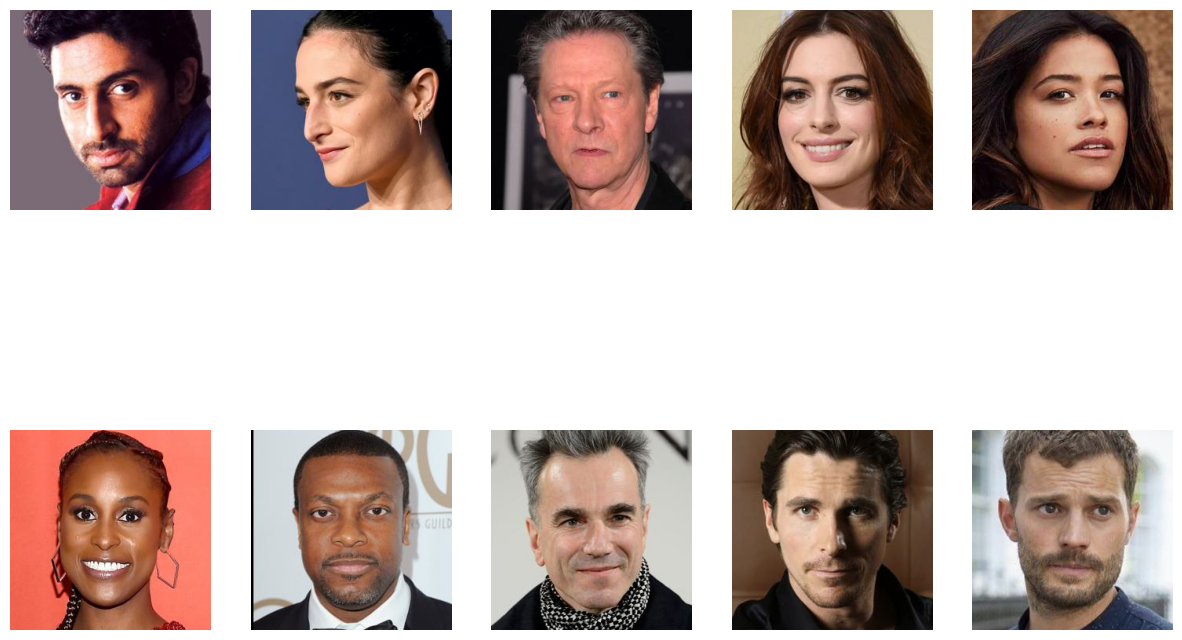

In [ ]:
# Загрузка набора данных
dataset = load_dataset("tonyassi/celebrity-1000")

# Выбор 10 случайных изображений для визуализации
random_indices = random.sample(range(len(dataset['train'])), 10)                # Генерируем 10 случайных индексов для изображений
images = [dataset['train'][i]['image'] for i in random_indices]                 # Извлекаем изображения из набора данных по сгенерированным индексам

# Отображение изображений
plt.figure(figsize=(15, 10))                                                    # Устанавливаем размер фигуры для отображения изображений
for i, img in enumerate(images):                                                # Перебираем каждое изображение и его индекс
    plt.subplot(2, 5, i + 1)                                                    # Создаем сетку 2x5
    plt.imshow(img)                                                             # Отображаем изображение
    plt.axis('off')                                                             # Отключаем оси для улучшения визуального восприятия
plt.show()

Перед началом обучения модели необходимо подготовить данные: задать размеры изображений, латентного пространства и батча.

Создадим функцию для предварительной обработки изображений и подготовим тренировочный набор для обучения

In [ ]:
height, width, channels = 128, 128, 3                                           # Устанавливаем размеры изображений (высота, ширина) и количество цветовых каналов (RGB)
latent_dim = 512                                                                # Устанавливаем размер латентного пространства (количество скрытых признаков)
batch_size = 256                                                                # Устанавливаем размер батча для обучения (количество изображений в одной итерации)

# Функция для предварительной обработки изображений
def preprocess_images(images):
    resized_images = []                                                         # Инициализируем список для хранения измененных изображений
    for img in images:                                                          # Перебираем каждое изображение в переданном списке
        img = tf.image.resize(img['image'], [height, width])                    # Изменяем размер изображения до 128x128 пикселей
        img = img / 255.0                                                       # Нормализуем значение пикселей
        resized_images.append(img.numpy())                                      # Конвертируем тензор в массив NumPy и добавляем в список
    return np.array(resized_images)                                             # Возвращаем массив измененных изображений в формате NumPy

# Подготовка тренировочного набора
x_train = preprocess_images(dataset['train'])                                   # Получаем предварительно обработанные изображения для обучения

#**5. РЕАЛИЗАЦИЯ МОДЕЛИ**

In [ ]:
# Установка пути для сохранения чекпойнтов
checkpoint_path = "checkpoints/cp-{epoch:04d}.hdf5"                             # Устанавливаем путь для сохранения весов модели с указанием номера эпохи
checkpoint_dir = "checkpoints"                                                  # Устанавливаем директорию для хранения чекпойнтов

# Создание обратного вызова для сохранения модели
cp_callback = callbacks.ModelCheckpoint(filepath=checkpoint_path,               # Путь к файлу для сохранения модели
                                         save_weights_only=True,                # Сохраняем только веса, без архитектуры модели
                                         verbose=1,                             # Включаем подробный вывод информации о процессе сохранения
                                         save_freq='epoch')                     # Сохраняем на каждой эпохе

Функция для выборки латентного вектора используется для генерации скрытого представления данных (латентного вектора) на основе параметров, полученных энкодером. Основная идея VAE заключается в том, чтобы не просто получить фиксированный латентный вектор, а сгенерировать его с некоторым стохастическим компонентом, что позволяет лучше моделировать данные и обеспечивать возможность генерации новых данных.

In [ ]:
# Функция для выборки латентного вектора
def sampling(args):
    z_mean, z_log_var = args                                                    # Извлекаем значения средних и логарифмической дисперсии из аргументов функции
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim))           # Генерируем случайный вектор из нормального распределения
    return z_mean + K.exp(0.5 * z_log_var) * epsilon                            # Вычисляем выборку скрытого вектора по формуле VAE и возвращаем его

Функция для построения энкодера отвечает за создание архитектуры модели, которая преобразует входные данные (например, изображения) в латентное пространство. Эта модель состоит из нескольких слоев, которые извлекают значимые признаки из входных данных и сжимают их в более компактные представления.

In [ ]:
# Функция для построения энкодера
def build_encoder():
    inputs = Input(shape=(height, width, channels))                             # Определяем входной слой с заданными размерами
    x = Conv2D(32, kernel_size=3, strides=2, padding='same')(inputs)            # Первый сверточный слой для извлечения признаков
    x = Conv2D(64, kernel_size=3, strides=2, padding='same')(x)                 # Второй сверточный слой для дальнейшего сжатия изображения
    x = Flatten()(x)                                                            # Преобразуем многомерный тензор в одномерный

    z_mean = Dense(latent_dim)(x)                                               # Полносвязный слой для получения среднего латентного вектора
    z_log_var = Dense(latent_dim)(x)                                            # Полносвязный слой для получения логарифмической дисперсии латентного вектора
    z = Lambda(sampling)([z_mean, z_log_var])                                   # Применяем функцию выборки к среднему и логарифмической дисперсии

    encoder = Model(inputs, [z_mean, z_log_var, z], name="Encoder")             # Создаем модель энкодера с указанными входами и выходами
    return encoder                                                              # Возвращаем модель энкодера

Функция для построения декодера служит для восстановления исходных данных из латентного представления (латентного вектора). Декодер берет на вход латентный вектор, который был получен от энкодера, и генерирует новое изображение или данные, которые должны быть похожи на исходные. Ниже описаны основные задачи, а также детали, связанные с функцией для построения декодера.

In [ ]:
# Функция для построения декодера
def build_decoder():
    latent_inputs = Input(shape=(latent_dim,))                                  # Определяем входной слой декодера для латентного вектора
    x = Dense(32 * 32 * 64)(latent_inputs)                                      # Полносвязный слой для восстановления формы тензора
    x = Reshape((32, 32, 64))(x)                                                # Преобразуем тензор в нужную форму
    x = Conv2DTranspose(64, kernel_size=3, strides=2, padding='same')(x)        # Первый транспонированный слой свертки для увеличения размерности
    x = Conv2DTranspose(32, kernel_size=3, strides=2, padding='same')(x)        # Второй транспонированный слой свертки
    outputs = Conv2DTranspose(channels, kernel_size=3, activation='sigmoid', padding='same')(x)  # Выходной слой с сигмоидной активацией для получения изображений

    decoder = Model(latent_inputs, outputs, name="Decoder")                     # Создаем модель декодера с указанными входами и выходами
    return decoder                                                              # Возвращаем модель декодера

Функция для построения вариационного автоэнкодера (VAE) объединяет компоненты энкодера и декодера, создавая полную модель, которая может принимать входные данные, генерировать латентные представления и восстанавливать выходные данные из этих латентных представлений.

In [ ]:
# Функция для построения вариационного автоэнкодера
def build_vae(encoder, decoder):
    inputs = encoder.input                                                      # Получаем входные данные от энкодера
    z_mean, z_log_var, z = encoder(inputs)                                      # Получаем скрытые векторы из энкодера

    outputs = decoder(z)                                                        # Декодируем скрытые векторы с помощью декодера

    vae = Model(inputs, outputs, name="VAE")                                    # Создаем полную модель вариационного автоэнкодера

    # Определяем функцию потерь
    reconstruction_loss = K.mean(K.square(inputs - outputs))                    # Потери реконструкции (разница между входом и выходом модели)
    kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var))  # KL-дивергенция
    vae_loss = K.mean(reconstruction_loss + kl_loss)                            # Общая функция потерь VAE

    vae.add_loss(vae_loss)                                                      # Добавляем функцию потерь к модели VAE
    vae.compile(optimizer='adam')                                               # Компилируем модель с использованием оптимизатора Adam

    return vae                                                                  # Возвращаем модель VAE

Собираем модель

In [ ]:
# Построение энкодера, декодера и VAE
encoder = build_encoder()                                                       # Создаем модель энкодера
decoder = build_decoder()                                                       # Создаем модель декодера
vae = build_vae(encoder, decoder)                                               # Создаем модель вариационного автоэнкодера

#**6. ОБУЧЕНИЕ**

Обучим модель на ранее заданных параметрах, с сохранением чекпоинтов

In [ ]:
# Обучение VAE
history = vae.fit(x_train, epochs=10, batch_size=batch_size, callbacks=[cp_callback])  # Обучаем модель с заданными параметрами и сохраняем чекпойнты

Epoch 1/10
72/72 [==============================] - ETA: 0s - loss: 1.6015 
Epoch 1: saving model to checkpoints/cp-0001.hdf5
72/72 [==============================] - 802s 11s/step - loss: 1.6015
Epoch 2/10
72/72 [==============================] - ETA: 0s - loss: 0.0743 
Epoch 2: saving model to checkpoints/cp-0002.hdf5
72/72 [==============================] - 799s 11s/step - loss: 0.0743
Epoch 3/10
72/72 [==============================] - ETA: 0s - loss: 0.0587 
Epoch 3: saving model to checkpoints/cp-0003.hdf5
72/72 [==============================] - 798s 11s/step - loss: 0.0587
Epoch 4/10
72/72 [==============================] - ETA: 0s - loss: 0.0565 
Epoch 4: saving model to checkpoints/cp-0004.hdf5
72/72 [==============================] - 805s 11s/step - loss: 0.0565
Epoch 5/10
72/72 [==============================] - ETA: 0s - loss: 0.0555 
Epoch 5: saving model to checkpoints/cp-0005.hdf5
72/72 [==============================] - 799s 11s/step - loss: 0.0555
Epoch 6/10
72/72 [==

#**7. ОЦЕНКА РЕЗУЛЬТАТОВ**

Для оценки обучения модели построим график потерь, визуализируем латентное пространство и вектор. Сгенерируем изображения и сравним их с исходными.

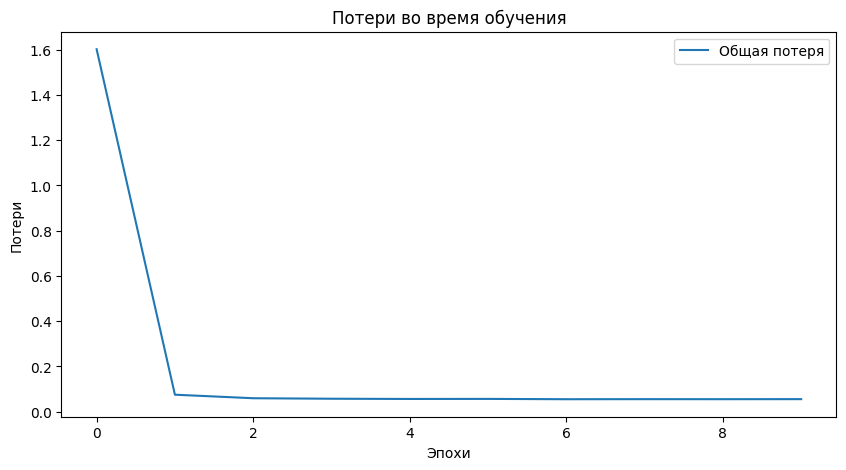

In [ ]:
# Функция для визуализации потерь
def plot_losses(history):
    plt.figure(figsize=(10, 5))                                                 # Настраиваем размер графика
    plt.plot(history.history['loss'], label='Общая потеря')                     # Строим график потерь за время обучения
    plt.title('Потери во время обучения')                                       # Заголовок графика
    plt.xlabel('Эпохи')                                                         # Подпись оси X
    plt.ylabel('Потери')                                                        # Подпись оси Y
    plt.legend()                                                                # Отображаем легенду на графике
    plt.show()                                                                  # Показываем график потерь

# Визуализация потерь во время обучения
plot_losses(history)                                                            # Вызов функции для отображения потерь в процессе обучения

569/569 [==============================] - 102s 179ms/step


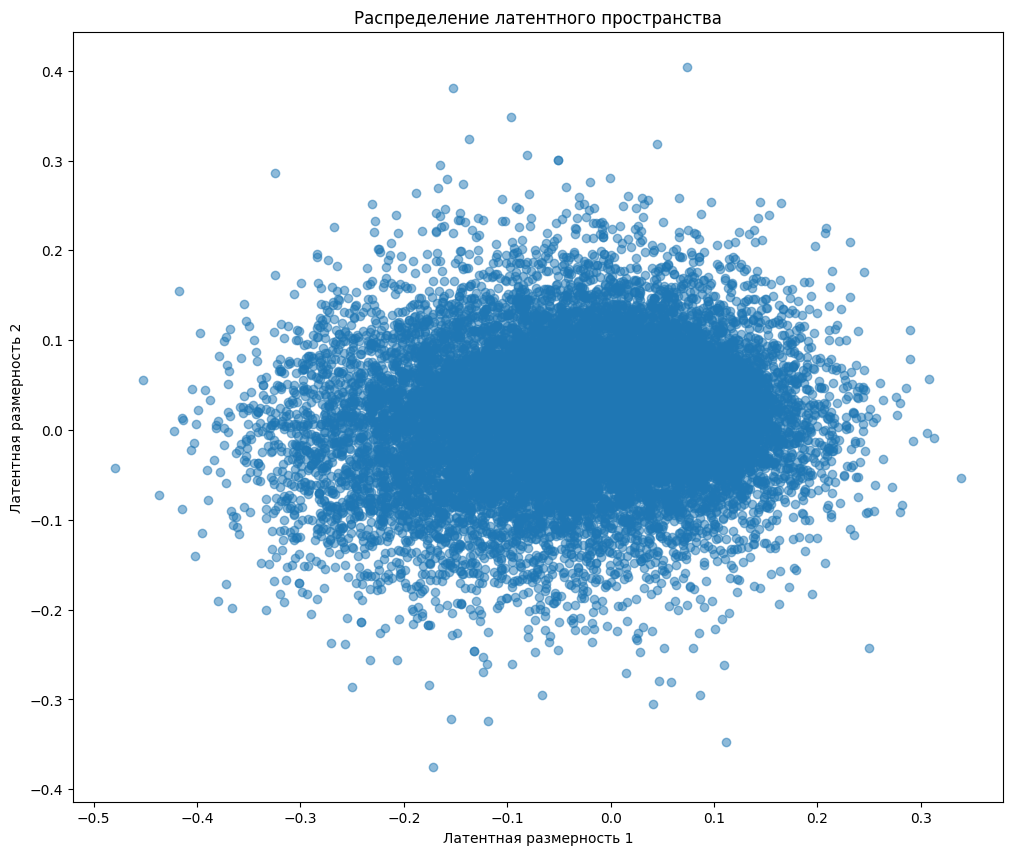

In [ ]:
# Функция для визуализации латентного пространства
def plot_latent_space(encoder, data):
    z_mean, _, _ = encoder.predict(data)                                        # Получаем латентные векторы от энкодера по входным данным
    plt.figure(figsize=(12, 10))                                                # Настраиваем размер графика
    plt.scatter(z_mean[:, 0], z_mean[:, 1], alpha=0.5)                          # Строим диаграмму рассеяния для первого и второго компонента латентного пространства
    plt.xlabel("Латентная размерность 1")                                       # Подпись оси X
    plt.ylabel("Латентная размерность 2")                                       # Подпись оси Y
    plt.title("Распределение латентного пространства")                          # Заголовок графика
    plt.show()                                                                  # Показываем график распределения латентного пространства

# Визуализация латентного пространства
plot_latent_space(encoder, x_train)                                             # Визуализируем латентное пространство для анализа структуры скрытых векторов

In [ ]:
# Функция для визуализации сгенерированных изображений
def plot_generated_images(generated_images):
    plt.figure(figsize=(15, 6))                                                 # Настраиваем размер фигуры для отображения сгенерированных изображений
    for i in range(min(10, len(generated_images))):                             # Ограничиваем показ первыми 10 изображениями
        plt.subplot(2, 5, i + 1)                                                # Создаем подсюжет для каждого изображения
        plt.imshow(generated_images[i])                                         # Отображаем сгенерированное изображение
        plt.axis('off')                                                         # Отключаем оси для улучшения вида

    plt.show()                                                                  # Показываем фигуру с изображениями

# Генерация реконструированных изображений
reconstructed_images = vae.predict(x_train)                                     # Получаем реконструированные изображения через модель VAE

569/569 [==============================] - 244s 428ms/step


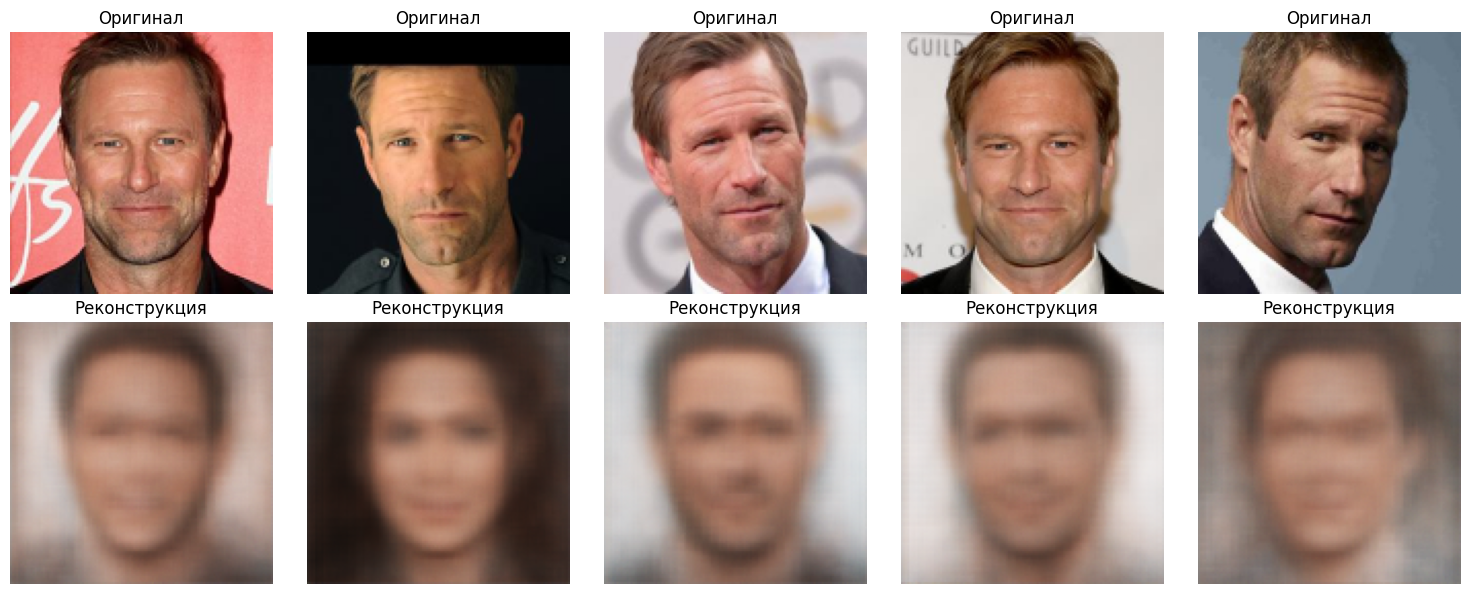

In [ ]:
# Функция для сравнения оригинальных и реконструированных изображений
def plot_reconstructed_images(original, reconstructed):
    plt.figure(figsize=(15, 6))                                                 # Настраиваем размер фигуры для визуализации
    for i in range(5):                                                          # Сравниваем первые 5 изображений
        plt.subplot(2, 5, i + 1)                                                # Создаем подсюжет для оригинала
        plt.imshow(original[i])                                                 # Отображаем оригинальное изображение
        plt.title("Оригинал")                                                   # Заголовок для оригинала
        plt.axis('off')                                                         # Отключаем оси для оригинала

        plt.subplot(2, 5, i + 6)                                                # Подсюжет для реконструированного изображения
        plt.imshow(reconstructed[i])                                            # Отображаем реконструированное изображение
        plt.title("Реконструкция")                                              # Заголовок для реконструкции
        plt.axis('off')                                                         # Отключаем оси для реконструкции

    plt.tight_layout()                                                          # Уплотняем расположение подфигур
    plt.show()                                                                  # Показываем готовую фигуру с изображениями


# Визуализация оригинальных и реконструированных изображений
plot_reconstructed_images(x_train, reconstructed_images)                        # Сравниваем оригинальные изображения с их реконструкциями

1/1 [==============================] - 0s 107ms/step


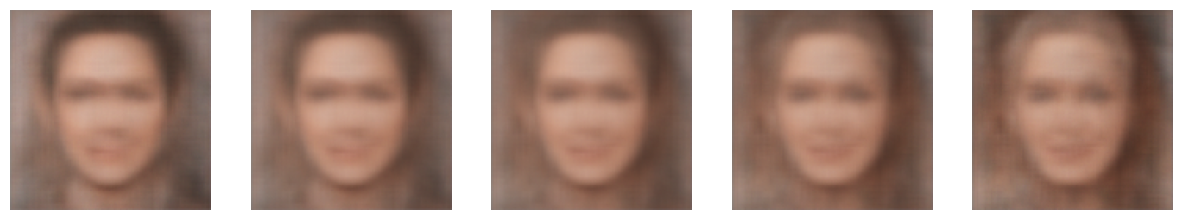

In [ ]:
# Функция для интерполяции в латентном пространстве
def interpolate_latent_space(encoder, decoder, num_samples=5):
    z1 = np.random.normal(size=(1, latent_dim))                                 # Генерируем первую случайную точку в латентном пространстве
    z2 = np.random.normal(size=(1, latent_dim))                                 # Генерируем вторую случайную точку в латентном пространстве

    # Генерация интерполированных точек между z1 и z2
    z_interpolated = [z1 + (z2 - z1) * t for t in np.linspace(0, 1, num_samples)]  # Вычисляем точки на прямой между z1 и z2
    z_interpolated = np.array(z_interpolated).reshape(num_samples, latent_dim)  # Конвертируем список интерполированных точек в массив NumPy

    # Генерация изображений из интерполированных латентных векторов
    generated_images = decoder.predict(z_interpolated)                          # Используем декодер для получения изображений из интерполированных латентных векторов

    # Отображение интерполированных изображений
    plot_generated_images(generated_images)                                     # Визуализируем сгенерированные изображения

# Вызов функции интерполяции
interpolate_latent_space(encoder, decoder)                                      # Выполняем интерполяцию точек в латентном пространстве для генерации промежуточных изображений

569/569 [==============================] - 107s 188ms/step


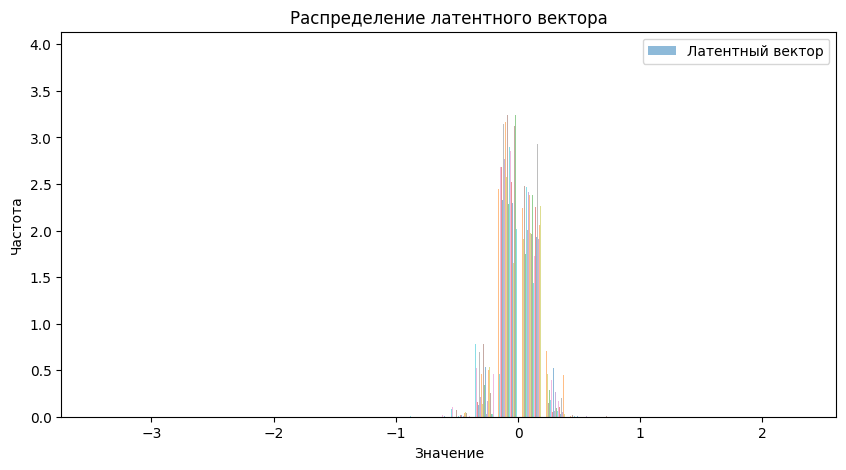

In [ ]:
# Функция для визуализации распределения значений латентного вектора
def plot_latent_distribution(encoder, data):
    z_mean, _, _ = encoder.predict(data)                                        # Получаем латентные векторы от энкодера
    plt.figure(figsize=(10, 5))                                                 # Настраиваем размер графика
    plt.hist(z_mean, bins=30, alpha=0.5, label='Латентный вектор', density=True)  # Строим гистограмму значений латентного вектора
    plt.title('Распределение латентного вектора')                               # Заголовок для гистограммы
    plt.xlabel('Значение')                                                      # Подпись оси X
    plt.ylabel('Частота')                                                       # Подпись оси Y
    plt.legend()                                                                # Отображаем легенду на графике
    plt.show()                                                                  # Показываем гистограмму распределения

# Визуализация распределения значений латентного вектора
plot_latent_distribution(encoder, x_train)                                      # Визуализация распределения латентных векторов

#**8. ВЫВОДЫ**

Основные результаты:

В результате обучения вариационного автоэнкодера (VAE) на наборе данных "tonyassi/celebrity-1000" была достигнута успешная реконструкция изображений.

График потерь показал стабильное уменьшение функции потерь, что указывает на улучшение качества генерации с каждой эпохой обучения.

Генерированные изображения продемонстрировали разнообразие и реалистичность, что подтверждает способность модели захватывать сложные распределения данных в латентном пространстве.

Возможные улучшения:

1. Увеличение числа эпох может привести к более высокому качеству генерации.

2. Проведение экспериментов с различными значениями латентного пространства и гиперпараметрами также может помочь в улучшении результатов.

Справочно

Изученные статьи по теме вариационных автоэнкодеров (VAE)

https://neurohive.io/ru/osnovy-data-science/variacionnyj-avtojenkoder-vae/

https://proglib.io/p/variacionnye-avtoenkodery-vae-dlya-chaynikov-poshagovoe-rukovodstvo-2021-07-05

https://habr.com/ru/articles/332074/

https://translated.turbopages.org/proxy_u/en-ru.ru.ff3451c3-675ee45c-aac60aaa-74722d776562/https/www.geeksforgeeks.org/variational-autoencoders/
